In [1]:
import pandas as pd
df = pd.read_csv("Amazon_Samsung_Review.csv")

## Case Folding

In [2]:
df_clean = pd.DataFrame(df)

df_clean['case_folding'] = df_clean.Reviews.str.lower()

df_clean.head()

,Product Name,Brand_Name,Price,Rating,Reviews,Review Votes,case_folding
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu..."
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,very pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...


## Remove URL (if available)

In [3]:
import re

#remove url
df_clean['remove_url'] = df_clean['case_folding'].apply(lambda x: re.sub(r'https?:\/\/\S+', '', str(x)))
df_clean['remove_url'] = df_clean['remove_url'].apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', str(x)))

#removeplaceholder
df_clean['remove_url'] = df_clean['remove_url'].apply(lambda x: re.sub(r'{link}', '', str(x)))
df_clean['remove_url'] = df_clean['remove_url'].apply(lambda x: re.sub(r"\[video\}", '', str(x)))
#remove domain
df_clean['remove_url'] = df_clean['remove_url'].apply(lambda x: re.sub(r"http", '', str(x)))
df_clean['remove_url'] = df_clean['remove_url'].apply(lambda x: re.sub(r"https", '', str(x)))

df_clean.head()

,Product Name,Brand_Name,Price,Rating,Reviews,Review Votes,case_folding,remove_url
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used (phone...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice up grade from my pantach revu..."
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,very pleased,very pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...,great phone to replace my lost phone. the only...


## Contraction

In [4]:
import contractions


df_clean['expand_word'] = df_clean['remove_url'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df_clean.head()


,Product Name,Brand_Name,Price,Rating,Reviews,Review Votes,case_folding,remove_url,expand_word
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used (phone...,"[i, feel, so, lucky, to, have, found, this, us..."
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice up grade from my pantach revu...","[nice, phone,, nice, up, grade, from, my, pant..."
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,very pleased,very pleased,"[very, pleased]"
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,"[it, works, good, but, it, goes, slow, sometim..."
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...,great phone to replace my lost phone. the only...,"[great, phone, to, replace, my, lost, phone., ..."


## Remove Unimportant Characters

In [5]:
import string


def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#remove html character
df_clean['expand_word'] = df_clean['expand_word'].apply(lambda x: re.sub(r'&[a-z]+;','', str(x)))

#remove non-letter characters
df_clean['expand_word']= df_clean['expand_word'].apply(lambda x:re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]",'', str(x)))

df_clean['expand_word'] = df_clean['expand_word'].str.strip()

#storing the puntuation free text
df_clean['remove_char'] = df_clean['expand_word'].apply(lambda x:remove_punctuation(x))


df_clean.head()

,Product Name,Brand_Name,Price,Rating,Reviews,Review Votes,case_folding,remove_url,expand_word,remove_char
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used (phone...,'i' 'feel' 'so' 'lucky' 'to' 'have' 'found' 't...,i feel so lucky to have found this used phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice up grade from my pantach revu...",'nice' 'phone' 'nice' 'up' 'grade' 'from' 'my'...,nice phone nice up grade from my pantach revue...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,very pleased,very pleased,'very' 'pleased'],very pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,'it' 'works' 'good' 'but' 'it' 'goes' 'slow' '...,it works good but it goes slow sometimes but i...
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...,great phone to replace my lost phone. the only...,'great' 'phone' 'to' 'replace' 'my' 'lost' 'ph...,great phone to replace my lost phone the only ...


## Remove Stopwords

In [6]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords


stop_words = stopwords.words('english')
df_clean['remove_stopword'] = df_clean['remove_char'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_clean['remove_stopword'] = df_clean['remove_char'].str.lstrip()
df_clean['remove_stopword'] = df_clean['remove_char'].replace(r'\s+', ' ', regex=True)

df_clean.head()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,Product Name,Brand_Name,Price,Rating,Reviews,Review Votes,case_folding,remove_url,expand_word,remove_char,remove_stopword
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used (phone...,'i' 'feel' 'so' 'lucky' 'to' 'have' 'found' 't...,i feel so lucky to have found this used phone ...,i feel so lucky to have found this used phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice up grade from my pantach revu...",'nice' 'phone' 'nice' 'up' 'grade' 'from' 'my'...,nice phone nice up grade from my pantach revue...,nice phone nice up grade from my pantach revue...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,very pleased,very pleased,'very' 'pleased'],very pleased,very pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,'it' 'works' 'good' 'but' 'it' 'goes' 'slow' '...,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...,great phone to replace my lost phone. the only...,'great' 'phone' 'to' 'replace' 'my' 'lost' 'ph...,great phone to replace my lost phone the only ...,great phone to replace my lost phone the only ...


## POS-Tagging Lemmatization

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


# Lemmatizing
df_clean['lemmatized'] = df_clean['remove_stopword'].apply(lambda x: lemmatize_sentence(x))

df.head()

,Product Name,Brand_Name,Price,Rating,Reviews,Review Votes,case_folding,remove_url,expand_word,remove_char,remove_stopword,lemmatized
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used (phone...,'i' 'feel' 'so' 'lucky' 'to' 'have' 'found' 't...,i feel so lucky to have found this used phone ...,i feel so lucky to have found this used phone ...,i feel so lucky to have find this used phone t...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice up grade from my pantach revu...",'nice' 'phone' 'nice' 'up' 'grade' 'from' 'my'...,nice phone nice up grade from my pantach revue...,nice phone nice up grade from my pantach revue...,nice phone nice up grade from my pantach revue...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,very pleased,very pleased,'very' 'pleased'],very pleased,very pleased,very pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,'it' 'works' 'good' 'but' 'it' 'goes' 'slow' '...,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,it work good but it go slow sometimes but its ...
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...,great phone to replace my lost phone. the only...,'great' 'phone' 'to' 'replace' 'my' 'lost' 'ph...,great phone to replace my lost phone the only ...,great phone to replace my lost phone the only ...,great phone to replace my lose phone the only ...


In [8]:
df_clean.drop_duplicates(subset ="lemmatized",
                     keep = False, inplace = True)
df_clean.head()
df_clean.count()

Product Name       18854
Brand_Name         18854
Price              18436
Rating             18854
Reviews            18854
Review Votes       18617
case_folding       18854
remove_url         18854
expand_word        18854
remove_char        18854
remove_stopword    18854
lemmatized         18854
dtype: int64

In [9]:
df_clean = df_clean.dropna()
df_clean.count()

Product Name       18199
Brand_Name         18199
Price              18199
Rating             18199
Reviews            18199
Review Votes       18199
case_folding       18199
remove_url         18199
expand_word        18199
remove_char        18199
remove_stopword    18199
lemmatized         18199
dtype: int64

In [10]:
df_clean.groupby('Rating').count()

,Product Name,Brand_Name,Price,Reviews,Review Votes,case_folding,remove_url,expand_word,remove_char,remove_stopword,lemmatized
Rating,,,,,,,,,,,
1,3353,3353,3353,3353,3353,3353,3353,3353,3353,3353,3353
2,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210
3,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554
4,2943,2943,2943,2943,2943,2943,2943,2943,2943,2943,2943
5,9139,9139,9139,9139,9139,9139,9139,9139,9139,9139,9139


<AxesSubplot:title={'center':'Rating'}>

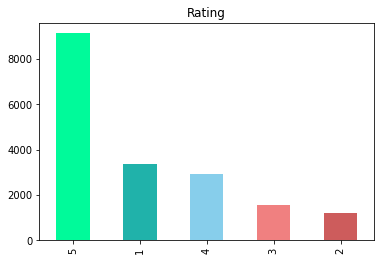

In [11]:
c = ['mediumspringgreen','lightseagreen', 'skyblue', 'lightcoral','indianred']
df_clean.Rating.value_counts().plot(kind='bar',title="Rating", color=c)

In [12]:
df_pos = df_clean[df_clean['Rating'].isin([4,5])]
df_pos.head()
df_pos.groupby('Rating').count()

,Product Name,Brand_Name,Price,Reviews,Review Votes,case_folding,remove_url,expand_word,remove_char,remove_stopword,lemmatized
Rating,,,,,,,,,,,
4,2943,2943,2943,2943,2943,2943,2943,2943,2943,2943,2943
5,9139,9139,9139,9139,9139,9139,9139,9139,9139,9139,9139


In [13]:
df_clean.to_csv("Amazon_Samsung_Review_Cleaned.csv", encoding="utf-8", index=False)

## word cloud

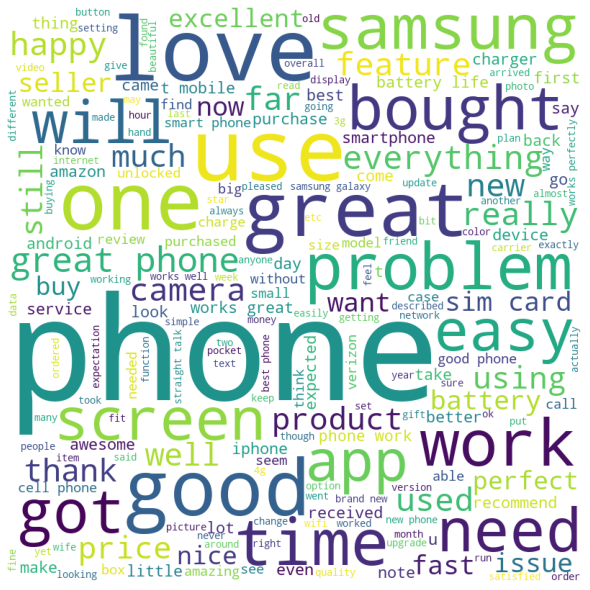

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_pos.Reviews:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()



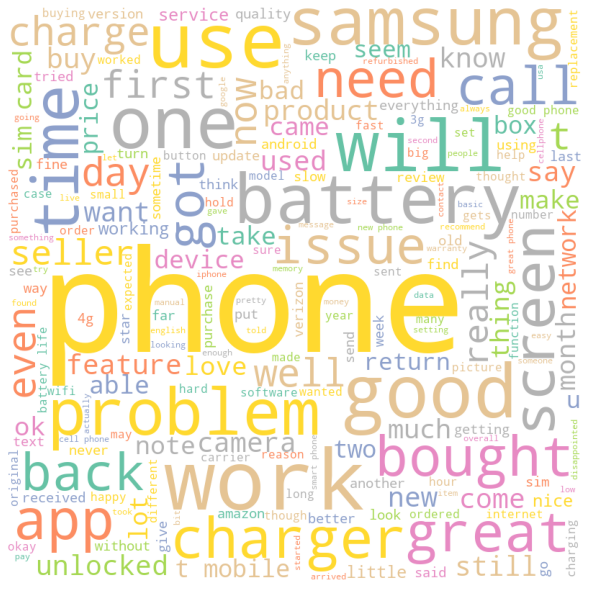

In [15]:
df_neut = df_clean[df_clean['Rating'].isin([3])]
df_neut.head()
df_neut.groupby('Rating').count()

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_neut.Reviews:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                colormap = "Set2",
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

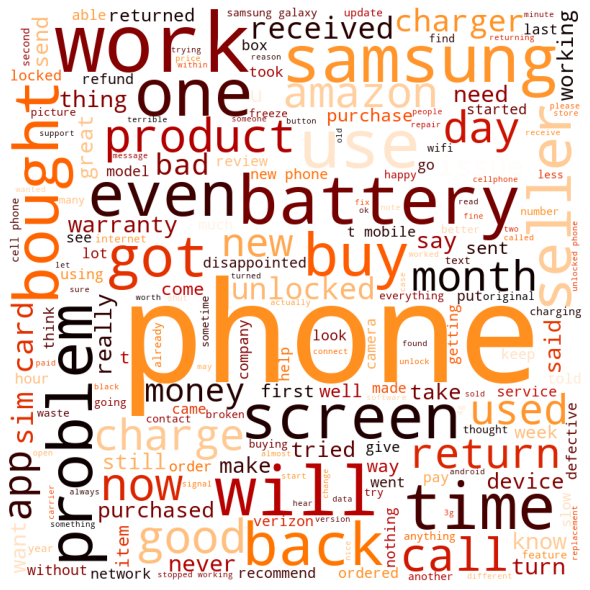

In [16]:
df_neg = df_clean[df_clean['Rating'].isin([1,2])]

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_neg.Reviews:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                colormap = "gist_heat",
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## Data Labelling

In [17]:
df_pos['Sentiment'] = "pos"
df_pos.head()

C:\Users\lutaz\AppData\Local\Temp\ipykernel_3640\4082407247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['Sentiment'] = "pos"


,Product Name,Brand_Name,Price,Rating,Reviews,Review Votes,case_folding,remove_url,expand_word,remove_char,remove_stopword,lemmatized,Sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used (phone...,'i' 'feel' 'so' 'lucky' 'to' 'have' 'found' 't...,i feel so lucky to have found this used phone ...,i feel so lucky to have found this used phone ...,i feel so lucky to have find this used phone t...,pos
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice up grade from my pantach revu...",'nice' 'phone' 'nice' 'up' 'grade' 'from' 'my'...,nice phone nice up grade from my pantach revue...,nice phone nice up grade from my pantach revue...,nice phone nice up grade from my pantach revue...,pos
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,'it' 'works' 'good' 'but' 'it' 'goes' 'slow' '...,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,it work good but it go slow sometimes but its ...,pos
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...,great phone to replace my lost phone. the only...,'great' 'phone' 'to' 'replace' 'my' 'lost' 'ph...,great phone to replace my lost phone the only ...,great phone to replace my lost phone the only ...,great phone to replace my lose phone the only ...,pos
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,i originally was using the samsung s2 galaxy f...,i originally was using the samsung s2 galaxy f...,'i' 'originally' 'was' 'using' 'the' 'samsung'...,i originally was using the samsung s galaxy fo...,i originally was using the samsung s galaxy fo...,i originally be use the samsung s galaxy for s...,pos


In [18]:
df_neg['Sentiment'] = "neg"
df_neg.head()

C:\Users\lutaz\AppData\Local\Temp\ipykernel_3640\2705413246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['Sentiment'] = "neg"


,Product Name,Brand_Name,Price,Rating,Reviews,Review Votes,case_folding,remove_url,expand_word,remove_char,remove_stopword,lemmatized,Sentiment
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,i already had a phone with problems... i know ...,i already had a phone with problems... i know ...,'i' 'already' 'had' 'a' 'phone' 'with' 'proble...,i already had a phone with problems i know it ...,i already had a phone with problems i know it ...,i already have a phone with problem i know it ...,neg
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,the charging port was loose. i got that solder...,the charging port was loose. i got that solder...,'the' 'charging' 'port' 'was' 'loose' 'i' 'got...,the charging port was loose i got that soldere...,the charging port was loose i got that soldere...,the charge port be loose i get that solder in ...,neg
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,"phone looks good but wouldn't stay charged, ha...","phone looks good but wouldn't stay charged, ha...",'phone' 'looks' 'good' 'but' 'would not' 'stay...,phone looks good but would not stay charged ha...,phone looks good but would not stay charged ha...,phone look good but would not stay charge have...,neg
13,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I'm really disappointed about my phone and ser...,1.0,i'm really disappointed about my phone and ser...,i'm really disappointed about my phone and ser...,'i am' 'really' 'disappointed' 'about' 'my' 'p...,i am really disappointed about my phone and se...,i am really disappointed about my phone and se...,i be really disappointed about my phone and se...,neg
15,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,Had this phone before and loved it but was not...,0.0,had this phone before and loved it but was not...,had this phone before and loved it but was not...,'had' 'this' 'phone' 'before' 'and' 'loved' 'i...,had this phone before and loved it but was not...,had this phone before and loved it but was not...,have this phone before and love it but be not ...,neg


In [19]:
df_neut['Sentiment'] = "neut"
df_neut.head()

C:\Users\lutaz\AppData\Local\Temp\ipykernel_3640\3138527694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neut['Sentiment'] = "neut"


,Product Name,Brand_Name,Price,Rating,Reviews,Review Votes,case_folding,remove_url,expand_word,remove_char,remove_stopword,lemmatized,Sentiment
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0,it's battery life is great. it's very responsi...,it's battery life is great. it's very responsi...,'it is' 'battery' 'life' 'is' 'great' 'it is' ...,it is battery life is great it is very respons...,it is battery life is great it is very respons...,it be battery life be great it be very respons...,neut
10,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,"My fiance had this phone previously, but cause...",0.0,"my fiance had this phone previously, but cause...","my fiance had this phone previously, but cause...",'my' 'fiance' 'had' 'this' 'phone' 'previously...,my fiance had this phone previously but caused...,my fiance had this phone previously but caused...,my fiance have this phone previously but cause...,neut
19,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,unfortunately Sprint could not activate the ph...,0.0,unfortunately sprint could not activate the ph...,unfortunately sprint could not activate the ph...,'unfortunately' 'sprint' 'could' 'not' 'activa...,unfortunately sprint could not activate the ph...,unfortunately sprint could not activate the ph...,unfortunately sprint could not activate the ph...,neut
26,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,the reasons for the 3 star rating was it was i...,0.0,the reasons for the 3 star rating was it was i...,the reasons for the 3 star rating was it was i...,'the' 'reasons' 'for' 'the' '' 'star' 'rating'...,the reasons for the star rating was it was in...,the reasons for the star rating was it was in ...,the reason for the star rating be it be in my ...,neut
60,Cricket Samsung Galaxy Discover R740 Phone,Samsung,24.99,3,The phone is good i like it. But when i Skype ...,0.0,the phone is good i like it. but when i skype ...,the phone is good i like it. but when i skype ...,'the' 'phone' 'is' 'good' 'i' 'like' 'it' 'but...,the phone is good i like it but when i skype t...,the phone is good i like it but when i skype t...,the phone be good i like it but when i skype t...,neut


In [20]:
df_combined = pd.concat([df_pos,df_neg,df_neut])
df_combined.groupby('Sentiment').count()

,Product Name,Brand_Name,Price,Rating,Reviews,Review Votes,case_folding,remove_url,expand_word,remove_char,remove_stopword,lemmatized
Sentiment,,,,,,,,,,,,
neg,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563
neut,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554
pos,12082,12082,12082,12082,12082,12082,12082,12082,12082,12082,12082,12082


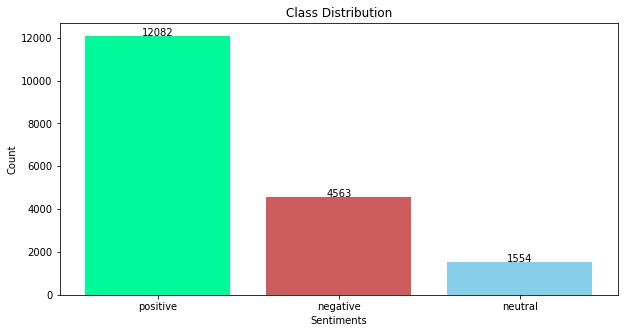

In [21]:
# importing library
import matplotlib.pyplot as plt
  
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = ["positive","negative","neutral"]
    y = [12082, 4563, 1554]
    c = ['mediumspringgreen', 'indianred', 'skyblue']
    # setting figure size by using figure() function 
    plt.figure(figsize = (10, 5))
      
    # making the bar chart on the data
    plt.bar(x, y, color=c)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Class Distribution")
      
    # giving X and Y labels
    plt.xlabel("Sentiments")
    plt.ylabel("Count")
      
    # visualizing the plot
    plt.show()

In [22]:
#length for each review
df_clean['review_len'] = df['lemmatized'].apply(lambda x: len(str(x)))

In [23]:
#word count for each review
df_clean['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))

C:\Users\lutaz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


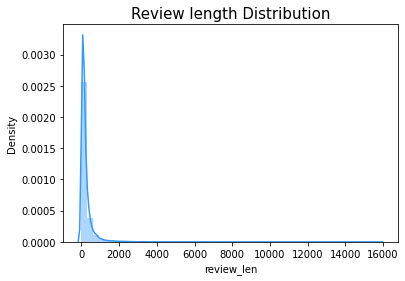

C:\Users\lutaz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


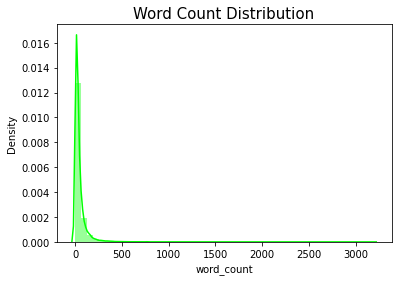

In [24]:
import seaborn as sns
features = ['review_len', 'word_count']

titles = [ 'Review length Distribution', 'Word Count Distribution']
colors = [ '#3399ff', '#00ff00','#0ff00', '#ff6600']

for feature, title, color in zip(features, titles, colors): 
    sns.distplot(x=df_clean[feature], bins=50, color=color)
    plt.title(title, size=15)
    plt.xlabel(feature)
    plt.show()

In [25]:
df_pos_sampled = df_pos.sample(n = 4563, random_state = 20)

In [26]:
df_combined = pd.concat([df_pos_sampled,df_neg,df_neut])
df_combined.groupby('Sentiment').count()

,Product Name,Brand_Name,Price,Rating,Reviews,Review Votes,case_folding,remove_url,expand_word,remove_char,remove_stopword,lemmatized
Sentiment,,,,,,,,,,,,
neg,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563
neut,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554
pos,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563


In [27]:
df_combined.count()

Product Name       10680
Brand_Name         10680
Price              10680
Rating             10680
Reviews            10680
Review Votes       10680
case_folding       10680
remove_url         10680
expand_word        10680
remove_char        10680
remove_stopword    10680
lemmatized         10680
Sentiment          10680
dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}>

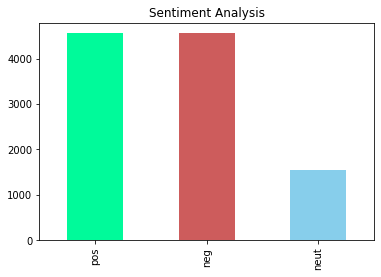

In [28]:
c = ['mediumspringgreen', 'indianred', 'skyblue']
df_combined.Sentiment.value_counts().plot(kind='bar',title="Sentiment Analysis", color=c)

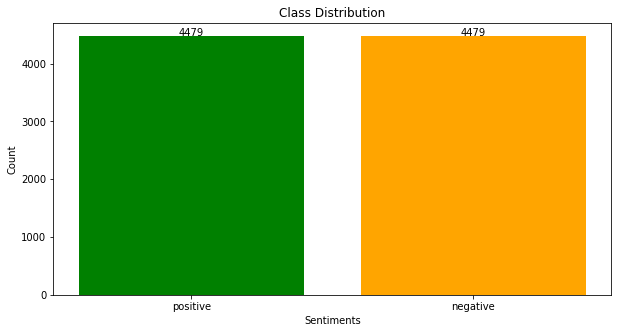

In [29]:
# importing library
import matplotlib.pyplot as plt
  
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = ["positive","negative"]
    y = [4479, 4479]
    c = ['green','orange'] 
    # setting figure size by using figure() function 
    plt.figure(figsize = (10, 5))
      
    # making the bar chart on the data
    plt.bar(x, y, color=c)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Class Distribution")
      
    # giving X and Y labels
    plt.xlabel("Sentiments")
    plt.ylabel("Count")
      
    # visualizing the plot
    plt.show()

In [30]:
df_combined.to_csv("Amazon_Samsung_Review_Labelled.csv", encoding="utf-8", index=False)

## Remove Neutral

In [31]:
df_labelled = df_combined[df_combined.Sentiment !="neut"]
df_labelled.groupby('Sentiment').count()

,Product Name,Brand_Name,Price,Rating,Reviews,Review Votes,case_folding,remove_url,expand_word,remove_char,remove_stopword,lemmatized
Sentiment,,,,,,,,,,,,
neg,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563
pos,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563


## Percentage of Positive and Negative

In [32]:
label_count = df_labelled.groupby('Sentiment').count()
label_sum = label_count.sum()
label_perc = label_count / label_sum * 100
print("percentage:")
print(label_perc)

percentage:
           Product Name  Brand_Name  Price  Rating  Reviews  Review Votes  \
Sentiment                                                                   
neg                50.0        50.0   50.0    50.0     50.0          50.0   
pos                50.0        50.0   50.0    50.0     50.0          50.0   

           case_folding  remove_url  expand_word  remove_char  \
Sentiment                                                       
neg                50.0        50.0         50.0         50.0   
pos                50.0        50.0         50.0         50.0   

           remove_stopword  lemmatized  
Sentiment                               
neg                   50.0        50.0  
pos                   50.0        50.0  


## TF-IDF (Vectorizer)

In [33]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train,y_test = train_test_split(df_labelled.lemmatized, df_labelled.Sentiment, test_size=0.2, random_state=1000) 
df.head()

,Product Name,Brand_Name,Price,Rating,Reviews,Review Votes,case_folding,remove_url,expand_word,remove_char,remove_stopword,lemmatized
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,i feel so lucky to have found this used (phone...,i feel so lucky to have found this used (phone...,'i' 'feel' 'so' 'lucky' 'to' 'have' 'found' 't...,i feel so lucky to have found this used phone ...,i feel so lucky to have found this used phone ...,i feel so lucky to have find this used phone t...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice up grade from my pantach revu...",'nice' 'phone' 'nice' 'up' 'grade' 'from' 'my'...,nice phone nice up grade from my pantach revue...,nice phone nice up grade from my pantach revue...,nice phone nice up grade from my pantach revue...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,very pleased,very pleased,'very' 'pleased'],very pleased,very pleased,very pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,'it' 'works' 'good' 'but' 'it' 'goes' 'slow' '...,it works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...,it work good but it go slow sometimes but its ...
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone to replace my lost phone. the only...,great phone to replace my lost phone. the only...,'great' 'phone' 'to' 'replace' 'my' 'lost' 'ph...,great phone to replace my lost phone the only ...,great phone to replace my lost phone the only ...,great phone to replace my lose phone the only ...


In [35]:
print('Training :', X_train.size)
print('Testing : ', y_test.size)

Training : 7300
Testing :  1826


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df = 5,  
                             max_df = 0.8,  
                             sublinear_tf = True,  
                             use_idf = True) 
 
train_tfidf = vect.fit_transform(X_train) 
test_tfidf = vect.transform(X_test)

## SVM

In [37]:
from sklearn import svm

classifier_linear = svm.SVC(kernel='linear')

classifier_linear.fit(train_tfidf, y_train)

prediction_linear = classifier_linear.predict(test_tfidf)


In [38]:
#input tweet from user
review= "the phone is very bad the scratches on the screen is really bad but the sound quality is pretty good, buy at your own risk!"

# vectorize the word entered by user
review_vector = vect.transform([review]) 

#predict the word using model
result = classifier_linear.predict(review_vector)

string= str(result)

    
if string == "['pos']" :
    print("Positive")
       
        
else:
    print("Negative")
       

Negative


In [43]:
#input tweet from user
review= "this is the best phone i have ever used the feature is well made and it has the best battery life"

# vectorize the word entered by user
review_vector = vect.transform([review]) 

#predict the word using model
result = classifier_linear.predict(review_vector)

string= str(result)

    
if string == "['pos']" :
    print("Positive")
       
        
else:
    print("Negative")
       

Positive


## Evaluation 

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(prediction_linear,y_test)

array([[855, 109],
       [ 71, 791]], dtype=int64)

<AxesSubplot:>

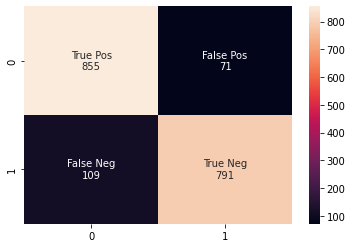

In [41]:
import sklearn.metrics as metrics
import seaborn as sns
group_names = ['True Pos','False Pos','False Neg','True Neg']
cf_matrix = metrics.confusion_matrix(y_test, prediction_linear)
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

In [42]:
print(classification_report(prediction_linear,y_test))

              precision    recall  f1-score   support

         neg       0.92      0.89      0.90       964
         pos       0.88      0.92      0.90       862

    accuracy                           0.90      1826
   macro avg       0.90      0.90      0.90      1826
weighted avg       0.90      0.90      0.90      1826

